In [1]:
import matplotlib as mpl
# mpl.use('agg')
import os
import numpy as np
import xarray as xr
from libs.myTrend import myfitting, myXfitting2d

pthrn='J:/Reanalysis/'
pthmd='J:/Models/'
pthob='J:/Obs/'

myRnly=[pthrn+i for i in os.listdir(pthrn) if i.endswith('.nc')]
myMdls=[pthmd+i for i in os.listdir(pthmd) if i.endswith('.nc')]
myObsv=[pthob+i for i in os.listdir(pthob) if i.endswith('.nc')]


In [63]:
myRnly

['J:/Reanalysis/myERA5_198001_202212_sst.nc',
 'J:/Reanalysis/myERSSTv3_198001_202012_sst.nc',
 'J:/Reanalysis/myHadlSST_198001_202312_sst.nc']

In [62]:
### Reanalysis SST trend =================================================
i=myRnly[2] ; lat_rng=[-80,-30] ; time_rng=['1980-01','2020-12']
mySST = xr.open_dataset(i).sst.loc[dict(lat=slice(lat_rng[0],lat_rng[-1])\
    ,time=slice(time_rng[0],time_rng[-1]))]
mySST=mySST.where(mySST<1000)
mySST_nm=mySST.long_name
lonR,latR=mySST.lon.values,mySST.lat.values


In [44]:
data_dt,CoefD=myXfitting2d(mySST)

In [51]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

Spheric=ccrs.SouthPolarStereo(central_longitude=0.0,globe=None)
PC = ccrs.PlateCarree(central_longitude=0.0,globe=None)
PC180 = ccrs.PlateCarree(central_longitude=180.0,globe=None)

MERC=ccrs.Mercator(central_longitude=180.0,globe=None)

### Figure configure ================================
Mycolorlist=['#1b2c62','#1f4181','#2455a1','#3877ba','#529bd2','#71b8e4','#91d2f2','#b2e0fa','#cbebf8','#e3f4fb',\
 '#f2f9e3','#fcf0b4','#fddb81','#fdc152','#fca12f','#f8822b','#ef5e29','#e03b28','#cc1e27','#ae191f']     
Mycmap = LinearSegmentedColormap.from_list('',Mycolorlist,N=256)

CNN=16
sstTlim=[-0.02,0.02]
sstT_levels=np.linspace(sstTlim[0], sstTlim[-1], CNN+1,endpoint=True)
CMAP_sstT = ListedColormap(Mycmap(
    np.linspace(0, 1, len(sstT_levels)-1,endpoint=True)) )

CoefD=CoefD.values*12
CoefD[CoefD<sstTlim[0]]=sstTlim[0]
CoefD[CoefD>sstTlim[-1]]=sstTlim[-1]

lonR_m,latR_m=np.meshgrid(lonR,latR)



AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [57]:
def myCrtpy_sph(LAT,LON,DATA,CMAP,LEVELS):
        fig, ax = plt.subplots(1, 1, figsize=(12.5,11),
                        subplot_kw={'projection': Spheric})
        theta = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        ax.set_boundary(circle, transform=ax.transAxes)
        ax.add_feature(cf.COASTLINE.with_scale("110m"), lw=1,zorder=110)
        ax.add_feature(cartopy.feature.LAND,color=[.75,.75,.75],zorder=100)
        # ax.set_title(t_name,loc='right',fontdict={'fontsize':32,'fontweight':'regular'})

        gl = ax.gridlines(crs=PC, draw_labels=True,y_inline=False,x_inline=False,
                        linewidth=.6, color='k', alpha=0.45, linestyle='-.')
        gl.rotate_labels=False
        gl.xlabels_top,gl.ylabels_right = True,True
        gl.xlabel_style = gl.ylabel_style = {"size" : 26}
        
        M=plt.contourf(LON,LAT,DATA,cmap=CMAP,levels=LEVELS,transform=PC)
        ax.set_extent([LON[0][0], LON[0][-1], LAT[0][0], LAT[-1][0]], crs=PC)
        
        ax.tick_params(axis='both', which='major', labelsize=28)

        divider = make_axes_locatable(ax)
        ax_cb = divider.new_horizontal(size="5%", pad=1., axes_class=plt.Axes)
        fig.add_axes(ax_cb)
        cb=plt.colorbar(M,extend='both',pad=0.08,cax=ax_cb)
        cb.set_label(label='', weight='regular',fontsize=28)
        cb.ax.tick_params(labelsize=19)
        plt.tight_layout()
        if 0:
            plt.savefig(w_path+'/ppt/'+save_name,
                    facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
            plt.savefig(w_path+'/'+save_name)
        plt.show()

c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


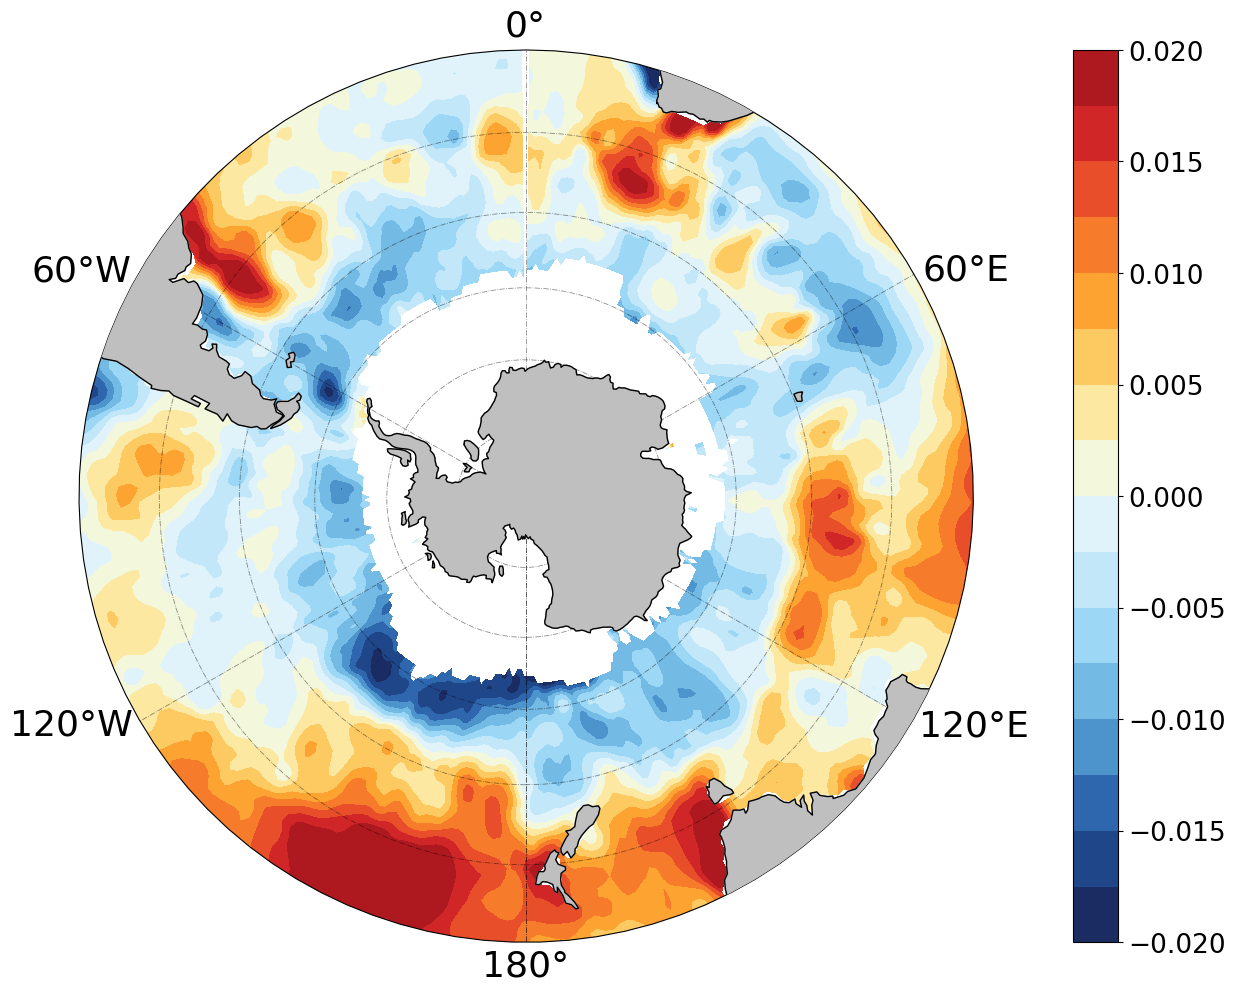

In [58]:
myCrtpy_sph(latR_m,lonR_m,CoefD,CMAP_sstT,sstT_levels)
